In [1]:
from ASV_dl_func import *

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
from omegaconf import OmegaConf

config = OmegaConf.load("config.yaml")

la_metadata = config.datasets.LA.metadata
la_flac_folders = config.datasets.LA.flac
la_columns = config.datasets.LA.columns

print("LA metadata:", la_metadata)
print("LA flac folders:", la_flac_folders)
print("LA columns:", la_columns)

LA metadata: I:/Downloads/LA-keys-full/keys/LA/CM/trial_metadata.txt
LA flac folders: ['I:/Downloads/ASVspoof2021_LA_eval/flac']
LA columns: ['speaker_id', 'file_id', 'codec', 'corpus', 'attack_id', 'label', 'trim', 'set']


In [4]:
# final_df = prepare_dataframe(all_data, sample_size=5000)
# final_df.to_csv("prepared_audio_data2.csv")
# final_df = pd.read_csv("prepared_audio_data2.csv")

In [5]:
X_train = pd.read_csv("csvki/all_data_ASV2019_inthewild.csv")
X_test = pd.read_csv("csvki/in_the_wild.csv")

In [6]:
X_train_aug = add_dataAugmentation(X_train)

In [7]:
feature_extractors_map = {
    'cqcc': extract_cqcc,
    'gtcc': extract_gtcc, 
    'mel-spect': extract_mel_spectrogram,
    'mfcc': extract_mfcc,
    'lfcc': extract_lfcc,
    #'wpt': extract_wpt,
    # 'Formants': analyze_formants_and_silence
}

In [8]:
X_train_1 = extract_features(X_train_aug, feature_extractors_map) 


   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 2752 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 4040 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15344 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 17944 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 28299 out of 28299 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: gtcc


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 11536 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 14336 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 28299 out of 28299 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


   - Ekstrahuję: mel-spect


[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 13760 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 17192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 28299 out of 28299 | elapsed:   49.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


   - Ekstrahuję: mfcc


[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 9456 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 17320 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 28299 out of 28299 | elapsed:   53.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


   - Ekstrahuję: lfcc


[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 14272 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 20176 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 28299 out of 28299 | elapsed:   47.2s finished


In [9]:
X_train_1.columns

Index(['Unnamed: 0', 'file_path', 'chunk_index', 'chunk_start', 'chunk_end',
       'label', 'filepath', 'augmentationType', 'cqcc', 'gtcc', 'mel-spect',
       'mfcc', 'lfcc'],
      dtype='object')

In [10]:
X_train_beznull = X_train_1.dropna(subset=['cqcc', 'gtcc', 'mel-spect',
       'mfcc', 'lfcc'])

In [11]:
X_train_beznull.shape

(14327, 13)

In [12]:
X_test = pd.read_csv("csvki/test_asv2016_data.csv")

In [13]:
X_test = extract_features(X_test, feature_extractors_map) 
X_test = X_test.dropna()

   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: gtcc


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: mel-spect


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   28.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: mfcc


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   30.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: lfcc


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   26.7s finished


# Sprawdzenie zbalansowanai

In [32]:
X_train_bez_scalowania = balance_func(X_train_beznull, col_name='label')

Zbilansowane dane: true=7269, false=7269


In [33]:
X_test_bez_scalowania = balance_func(X_test, col_name='label')

Zbilansowane dane: true=1033, false=1033


# Siec reszkowa

In [34]:
import numpy as np
import pandas as pd

def inspect_feature_columns(df, feature_cols):
    """
    Sprawdza typ, dtype i kształt (shape) każdej próbki
    w podanych kolumnach cechowych.
    """
    results = []

    for col in feature_cols:
        print(f"\n=== Kolumna: {col} ===")
        col_shapes = []
        col_types = []

        for i, val in enumerate(df[col]):
            # Sprawdź typ i kształt
            if isinstance(val, np.ndarray):
                shape = val.shape
                dtype = val.dtype
            elif isinstance(val, list):
                shape = (len(val),) if len(val) > 0 else (0,)
                dtype = type(val[0]) if len(val) > 0 else None
            else:
                shape = None
                dtype = type(val)

            col_shapes.append(shape)
            col_types.append(dtype)

            # Jeśli coś wygląda podejrzanie, zapisz szczegóły
            if shape != col_shapes[0] or dtype != col_types[0]:
                results.append({
                    "kolumna": col,
                    "indeks": i,
                    "typ": type(val),
                    "dtype": dtype,
                    "shape": shape
                })

        # Zbiorcze statystyki
        unique_shapes = set(col_shapes)
        unique_types = set(map(str, col_types))
        print(f"Unikalne kształty: {unique_shapes}")
        print(f"Unikalne typy: {unique_types}")

    if results:
        print("\n⚠️ Znaleziono potencjalne problemy:")
        problem_df = pd.DataFrame(results)
        display(problem_df)
    else:
        print("\n✅ Wszystkie kolumny mają spójne typy i wymiary.")

inspect_feature_columns(X_train_bez_scalowania, ['cqcc', 'gtcc', 'mel-spect', 'mfcc', 'lfcc'])


=== Kolumna: cqcc ===
Unikalne kształty: {(19, 63)}
Unikalne typy: {'float32'}

=== Kolumna: gtcc ===
Unikalne kształty: {(198, 13)}
Unikalne typy: {'float64'}

=== Kolumna: mel-spect ===
Unikalne kształty: {(64, 63)}
Unikalne typy: {'float32'}

=== Kolumna: mfcc ===
Unikalne kształty: {(13, 63)}
Unikalne typy: {'float32'}

=== Kolumna: lfcc ===
Unikalne kształty: {(198, 13)}
Unikalne typy: {'float64'}

✅ Wszystkie kolumny mają spójne typy i wymiary.


In [35]:
X_test_bez_scalowania.columns

Index(['Unnamed: 0', 'filepath', 'chunk_index', 'chunk_start', 'chunk_end',
       'label', 'cqcc', 'gtcc', 'mel-spect', 'mfcc', 'lfcc'],
      dtype='object')

In [ ]:
feature_cols = ['lfcc', 'mel-spect', 'mfcc']
trained_models = train_all_features(X_train_bez_scalowania, feature_cols, epochs=100, label_col="label", test_df=X_test_bez_scalowania, standard_scaler=False)


=== TRENING dla cechy: lfcc ===
[lfcc] Epoch 1/100 | Train Loss: 0.5480 | Train Acc: 0.7099 | Val Loss: 0.8813 | Val Acc: 0.5373


In [ ]:
feature_cols = ['cqcc', 'mfcc']
train_df_resnet, test_df_resnet, scaler_resnet = prepare_train_test_data_multi(X_train_bez_scalowania, feature_cols=feature_cols, label_name="label", test_df=X_test_bez_scalowania)

trained_models2 = train_all_features(train_df_resnet, feature_cols, epochs=100, label_col="label", test_df=test_df_resnet)


=== TRENING dla cechy: cqcc ===
[cqcc] Epoch 1/100 | Train Loss: 0.6943 | Train Acc: 0.5077 | Val Loss: 0.6700 | Val Acc: 0.7241
[cqcc] Epoch 2/100 | Train Loss: 0.6827 | Train Acc: 0.5507 | Val Loss: 0.6176 | Val Acc: 0.7217
[cqcc] Epoch 3/100 | Train Loss: 0.6650 | Train Acc: 0.5804 | Val Loss: 0.6139 | Val Acc: 0.7038
[cqcc] Epoch 4/100 | Train Loss: 0.6536 | Train Acc: 0.5976 | Val Loss: 0.6239 | Val Acc: 0.6713
[cqcc] Epoch 5/100 | Train Loss: 0.6444 | Train Acc: 0.6038 | Val Loss: 0.6068 | Val Acc: 0.7043
[cqcc] Epoch 6/100 | Train Loss: 0.6347 | Train Acc: 0.6158 | Val Loss: 0.5703 | Val Acc: 0.7304
[cqcc] Epoch 7/100 | Train Loss: 0.6276 | Train Acc: 0.6191 | Val Loss: 0.5714 | Val Acc: 0.7202
[cqcc] Epoch 8/100 | Train Loss: 0.6193 | Train Acc: 0.6303 | Val Loss: 0.5496 | Val Acc: 0.7478
[cqcc] Epoch 9/100 | Train Loss: 0.6078 | Train Acc: 0.6409 | Val Loss: 0.5662 | Val Acc: 0.7343
[cqcc] Epoch 10/100 | Train Loss: 0.6054 | Train Acc: 0.6417 | Val Loss: 0.5427 | Val Acc: 0.7

# BiLSTM

In [14]:
cqcc_map = {"cqcc": extract_cqcc}

In [15]:
X_train_bez_scalowania = extract_features(X_train, cqcc_map) 
X_test_bez_scalowania = extract_features(X_test, cqcc_map) 

   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3052 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4552 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6252 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 8152 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 10111 out of 10126 | elapsed:  4.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 10126 out of 10126 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   53.8s finished


Zbilansowane dane: true=5063, false=5063
Zbilansowane dane: true=1033, false=1033
Tworzenie DataLoaderów...
Utworzono folder:  GMM-BiLSTM
Liczba partii treningowych: 633, Liczba partii testowych: 130
Początek pętli treningowej BiLSTM...
Epoch 1/200 | Train Loss: 0.6132 | Val Loss: 0.7215 | Val Acc: 0.5455
Epoch 2/200 | Train Loss: 0.6162 | Val Loss: 0.6183 | Val Acc: 0.6500
Epoch 3/200 | Train Loss: 0.5323 | Val Loss: 0.5837 | Val Acc: 0.6931
Epoch 4/200 | Train Loss: 0.4045 | Val Loss: 0.4970 | Val Acc: 0.7556
Epoch 5/200 | Train Loss: 0.3258 | Val Loss: 0.4599 | Val Acc: 0.7904
Epoch 6/200 | Train Loss: 0.2758 | Val Loss: 0.4142 | Val Acc: 0.8093
Epoch 7/200 | Train Loss: 0.2344 | Val Loss: 0.4003 | Val Acc: 0.8136
Epoch 8/200 | Train Loss: 0.2024 | Val Loss: 0.4508 | Val Acc: 0.8166
Epoch 9/200 | Train Loss: 0.1752 | Val Loss: 0.4100 | Val Acc: 0.8248
Epoch 10/200 | Train Loss: 0.1543 | Val Loss: 0.4795 | Val Acc: 0.8195
Epoch 11/200 | Train Loss: 0.1367 | Val Loss: 0.4240 | Val Acc

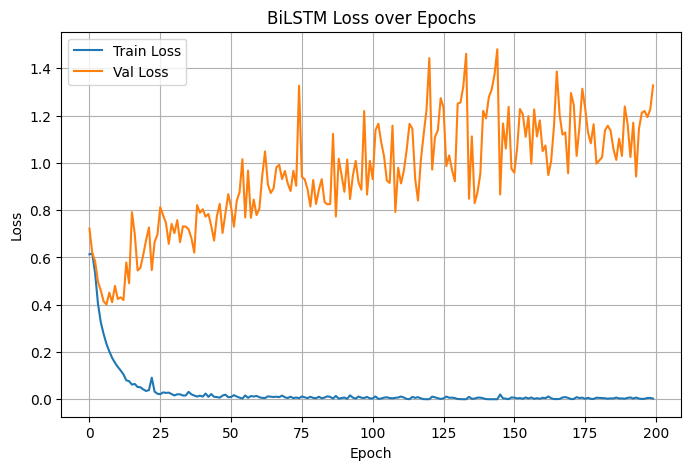

Model BiLSTM zapisany w 'GMM-BiLSTM\bilstm_model.pt'


In [20]:
X_train_bilstm = filtr_nan(X_train_bez_scalowania)
X_train_bilstm['cqcc'] = X_train_bilstm['cqcc'].apply(transpose_cqcc)

X_test_bilstm = filtr_nan(X_test_bez_scalowania)
X_test_bilstm['cqcc'] = X_test_bilstm['cqcc'].apply(transpose_cqcc)
 
final_df = X_train_bilstm[X_train_bilstm['cqcc'].notnull()]
final_df_balanced = balance_func(final_df, col_name='label')

test_df = X_test_bilstm[X_test_bilstm['cqcc'].notnull()]
test_df_balanced = balance_func(test_df, col_name='label')


train_df, test_df, scaler = prepare_train_test_data(final_df_balanced, test_df=test_df_balanced, label_name='label')

model, test_loader = BiLSTM_model(train_df, test_df, num_epochs=200)

In [21]:
eval_model(model, train_df, test_df, test_loader, use_saved_models=False)

Trening Gaussian Mixture (UBM)...
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
Initialization did not converge.
Trening UBM zakończony w 491.92 sekund.
Adaptacja GMM dla klas Genuine i DF...
Adaptacja MAP zakończona w 90.11 sekund.
Modele GMM zapisane w folderze 'GMM-BiLSTM/'.
Ewaluacja zakończona w 10.98 sekund.

--- Wyniki końcowe ---
Accuracy: 0.8397870280735721
F1: 0.8505643340857788
EER: 0.20716360116166505


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [29]:
from cnn_bilstm_hybrid import *

train_df = X_train_bez_scalowania[X_train_bez_scalowania['cqcc'].notnull()]
train_df_balanced = balance_func(train_df, col_name='label')

test_df = X_test_bez_scalowania[X_test_bez_scalowania['cqcc'].notnull()]
test_df_balanced = balance_func(test_df, col_name='label')

# Weź wszystkie cechy cqcc jako macierz 2D (samples, features*time)
X_train_features = np.stack(train_df_balanced['cqcc'].values)  # (n_samples, 19, 63)
X_test_features = np.stack(test_df_balanced['cqcc'].values)    # (n_samples, 19, 63)

# Reshape do 2D, bo StandardScaler działa na (samples, features)
n_train, n_feat, n_time = X_train_features.shape
n_test = X_test_features.shape[0]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features.reshape(n_train, -1))
X_test_scaled = scaler.transform(X_test_features.reshape(n_test, -1))

# Przywróć pierwotny kształt
X_train_scaled = X_train_scaled.reshape(n_train, n_feat, n_time)
X_test_scaled = X_test_scaled.reshape(n_test, n_feat, n_time)

# Podmień kolumnę 'cqcc' w dataframe
train_df_balanced['cqcc'] = list(X_train_scaled)
test_df_balanced['cqcc'] = list(X_test_scaled)

train_dataset = CQCCDataset(train_df_balanced)
train_dataloader = DataLoader(train_dataset, batch_size=200, shuffle=True)

test_dataset = CQCCDataset(test_df_balanced)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AudioDeepfakeDetector(feature_dim=19).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.001)



Zbilansowane dane: true=9217, false=9217
Zbilansowane dane: true=1033, false=1033


In [30]:
train_losses = []
val_losses = []
train_loop(model, optimizer, criterion, train_dataloader, test_dataloader, device, train_losses, val_losses, 'cqcc', epochs = 100)

[cqcc] Epoch 1/100 | Train Loss: 0.6941 | Train Acc: 0.5000 | Val Loss: 0.6932 | Val Acc: 0.5000
[cqcc] Epoch 2/100 | Train Loss: 0.6933 | Train Acc: 0.5000 | Val Loss: 0.6922 | Val Acc: 0.5000
[cqcc] Epoch 3/100 | Train Loss: 0.6786 | Train Acc: 0.5000 | Val Loss: 0.5919 | Val Acc: 0.5000
[cqcc] Epoch 4/100 | Train Loss: 0.6445 | Train Acc: 0.5000 | Val Loss: 0.5957 | Val Acc: 0.5000
[cqcc] Epoch 5/100 | Train Loss: 0.6155 | Train Acc: 0.5000 | Val Loss: 0.5900 | Val Acc: 0.5000
[cqcc] Epoch 6/100 | Train Loss: 0.5951 | Train Acc: 0.5000 | Val Loss: 0.5615 | Val Acc: 0.5000
[cqcc] Epoch 7/100 | Train Loss: 0.5689 | Train Acc: 0.5000 | Val Loss: 0.5627 | Val Acc: 0.5000
[cqcc] Epoch 8/100 | Train Loss: 0.5523 | Train Acc: 0.5000 | Val Loss: 0.5711 | Val Acc: 0.5000
[cqcc] Epoch 9/100 | Train Loss: 0.5333 | Train Acc: 0.5000 | Val Loss: 0.5545 | Val Acc: 0.5000
[cqcc] Epoch 10/100 | Train Loss: 0.5201 | Train Acc: 0.5000 | Val Loss: 0.5473 | Val Acc: 0.5000
[cqcc] Epoch 11/100 | Train L


KeyboardInterrupt

